# Descriptions

The notebook compares the prod system outputs (PnL, DAG) when running with different values of history_lookback: 4 days vs 3 hours.

# Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import logging

import pandas as pd

import core.config as cconfig
import core.plotting as coplotti
import dataflow.core as dtfcore
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hpandas as hpandas
import helpers.hprint as hprint
import reconciliation as reconcil

/app/amp/core/explore.py:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton


In [3]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-0f467d5a-fb80-47db-93c7-c7881a936600.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.2' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='CmTask4498_shorten_history_amount_required_by_C8b'
  hash='6561ebdd2'
  # Last commits:
    * 6561ebdd2 Nina Lee CmTask4498_shorten_history_amount_required_by_C8b                 (   2 hours ago) Wed Jun 7 13:52:05 2023  (HEAD -> CmTask4498_shorten_history_amount_required_by_C8b, origin/CmTask4498_shorten_history_amount_required_by_C8b)
    * 5553bc9a3 Paul     Cm task4476 clean up and merge feature function 2 (#4517)       

# Config

In [4]:
config = {
    "bar_duration": "5T",
    "run_dag_comparison": True,
    "system_log_dir_path": {
        "prod": "/shared_data/C8b_history_lookback_experiments/system_log_dir_history_lookback_4_days",
        "candidate": "/shared_data/C8b_history_lookback_experiments/system_log_dir_history_lookback_3_hours",
    },
}
config = cconfig.Config().from_dict(config)
print(config)

bar_duration: 5T
run_dag_comparison: True
system_log_dir_path: 
  prod: /shared_data/C8b_history_lookback_experiments/system_log_dir_history_lookback_4_days
  candidate: /shared_data/C8b_history_lookback_experiments/system_log_dir_history_lookback_3_hours


# Specify the paths to DAG and Portfolio results

Currently we use `history_lookback` = 4 days in production, the candidate value of that is 3 hours.

In [5]:
# This dict points to `system_log_dir/dag/node_io/node_io.data` for different experiments.
data_type = "dag_data"
dag_path_dict = reconcil.get_system_log_paths(
    config["system_log_dir_path"].to_dict(), data_type
)
dag_path_dict

{'prod': '/shared_data/C8b_history_lookback_experiments/system_log_dir_history_lookback_4_days/dag/node_io/node_io.data',
 'candidate': '/shared_data/C8b_history_lookback_experiments/system_log_dir_history_lookback_3_hours/dag/node_io/node_io.data'}

In [6]:
# This dict points to `system_log_dir/process_forecasts/portfolio` for different experiments.
data_type = "portfolio"
portfolio_path_dict = reconcil.get_system_log_paths(
    config["system_log_dir_path"].to_dict(), data_type
)
portfolio_path_dict

{'prod': '/shared_data/C8b_history_lookback_experiments/system_log_dir_history_lookback_4_days/process_forecasts/portfolio',
 'candidate': '/shared_data/C8b_history_lookback_experiments/system_log_dir_history_lookback_3_hours/process_forecasts/portfolio'}

# Compare DAG output

In [7]:
# The last node, the last timestamp.
node_name = "predict.5.process_forecasts"
bar_timestamp = pd.Timestamp("2023-06-06 13:15:00-0400", tz="America/New_York")
#
dag_prod_df = dtfcore.get_dag_node_output(
    dag_path_dict["prod"], node_name, bar_timestamp
)
hpandas.df_to_str(dag_prod_df, num_rows=5, log_level=logging.INFO)

feature                                                                                                                                                                                                                                                                         adj_garman_klass_vol                                                                                                                                                                                                                                                                         adj_garman_klass_vol.low_pass                                                                                                                                                                                                                                                                         garman_klass_vol                                                                                                                                                                                                                                                                         garman_klass_vol.low_pass                                                                                                                                                                                                                                                                          pnl_ret_0                                                                                                                                                                                                                                                                         pnl_ret_0.vol_adj                                                                                                                                                                                                                                                                         pnl_vwap_ret_0                                                                                                                                                                                                                                                                         pnl_vwap_ret_0.vol_adj                                                                                                                                                                                                                                                                         target_ret_0                                                                                                                                                                                                                                                                         target_ret_0.vol_adj                                                                                                                                                                                                                                                                         target_vwap_ret_0                                                                                                                                                                                                                                                                         target_vwap_ret_0.vol_adj                                                                                                                                                                                                                                                                                 x1                                                                                                                                                                                                                                                                         x1.vol_adj                                    

In [8]:
dag_candidate_df = dtfcore.get_dag_node_output(
    dag_path_dict["candidate"], node_name, bar_timestamp
)
hpandas.df_to_str(dag_candidate_df, num_rows=3, log_level=logging.INFO)

feature                                                                                                                                                                                                                                                                         adj_garman_klass_vol                                                                                                                                                                                                                                                                         adj_garman_klass_vol.low_pass                                                                                                                                                                                                                                                                         garman_klass_vol                                                                                                                                                                                                                                                                         garman_klass_vol.low_pass                                                                                                                                                                                                                                                                          pnl_ret_0                                                                                                                                                                                                                                                                         pnl_ret_0.vol_adj                                                                                                                                                                                                                                                                         pnl_vwap_ret_0                                                                                                                                                                                                                                                                         pnl_vwap_ret_0.vol_adj                                                                                                                                                                                                                                                                         target_ret_0                                                                                                                                                                                                                                                                         target_ret_0.vol_adj                                                                                                                                                                                                                                                                         target_vwap_ret_0                                                                                                                                                                                                                                                                         target_vwap_ret_0.vol_adj                                                                                                                                                                                                                                                                                 x1                                                                                                                                                                                                                                                                         x1.vol_adj                                    

In [9]:
diff_threshold = 1e-3
compare_dfs_kwargs = {
    # Compare data only at intersecting indices as prod output has longer history.
    "row_mode": "inner",
    "diff_mode": "pct_change",
    "assert_diff_threshold": None,
}
diff_df = hpandas.compare_dfs(dag_prod_df, dag_candidate_df, **compare_dfs_kwargs)
max_diff = diff_df.abs().max().max()
max_diff

0.0

# Compare DAG execution time

Execution time reduced twice.

In [10]:
df_dag_execution_time_prod = dtfcore.get_execution_time_for_all_dag_nodes(
    dag_path_dict["prod"]
)
_LOG.info("DAG execution time:")
hpandas.df_to_str(df_dag_execution_time_prod, num_rows=3, log_level=logging.INFO)

INFO  DAG execution time:


,all_nodes,read_data,compute_vwap,resample,compute_normalized_features_and_target,generate_feature,process_forecasts
2023-06-06 10:00:00-04:00,29.972,5.478,6.525,2.76,6.669,4.279,4.261
,...,...,...,...,...,...,...
2023-06-06 14:00:00-04:00,43.508,7.482,10.997,3.745,9.196,7.085,5.003


In [11]:
df_dag_execution_time_candidate = dtfcore.get_execution_time_for_all_dag_nodes(
    dag_path_dict["candidate"]
)
_LOG.info("DAG execution time:")
hpandas.df_to_str(
    df_dag_execution_time_candidate, num_rows=3, log_level=logging.INFO
)

INFO  DAG execution time:


,all_nodes,read_data,compute_vwap,resample,compute_normalized_features_and_target,generate_feature,process_forecasts
2023-06-06 10:00:00-04:00,12.352,0.971,1.735,1.683,4.38,1.763,1.82
,...,...,...,...,...,...,...
2023-06-06 14:00:00-04:00,20.395,0.826,1.836,1.872,8.911,3.061,3.889


,mean,min,max,std
all_nodes,34.163878,29.939,44.272,3.777000
read_data,6.120163,5.455,9.007,0.867074
compute_vwap,7.472551,6.525,11.419,1.287621
resample,2.812816,2.316,4.085,0.497527
compute_normalized_features_and_target,7.682531,6.669,10.950,1.041467
generate_feature,5.026122,4.279,7.634,0.850473
process_forecasts,5.049694,4.207,7.912,0.931840


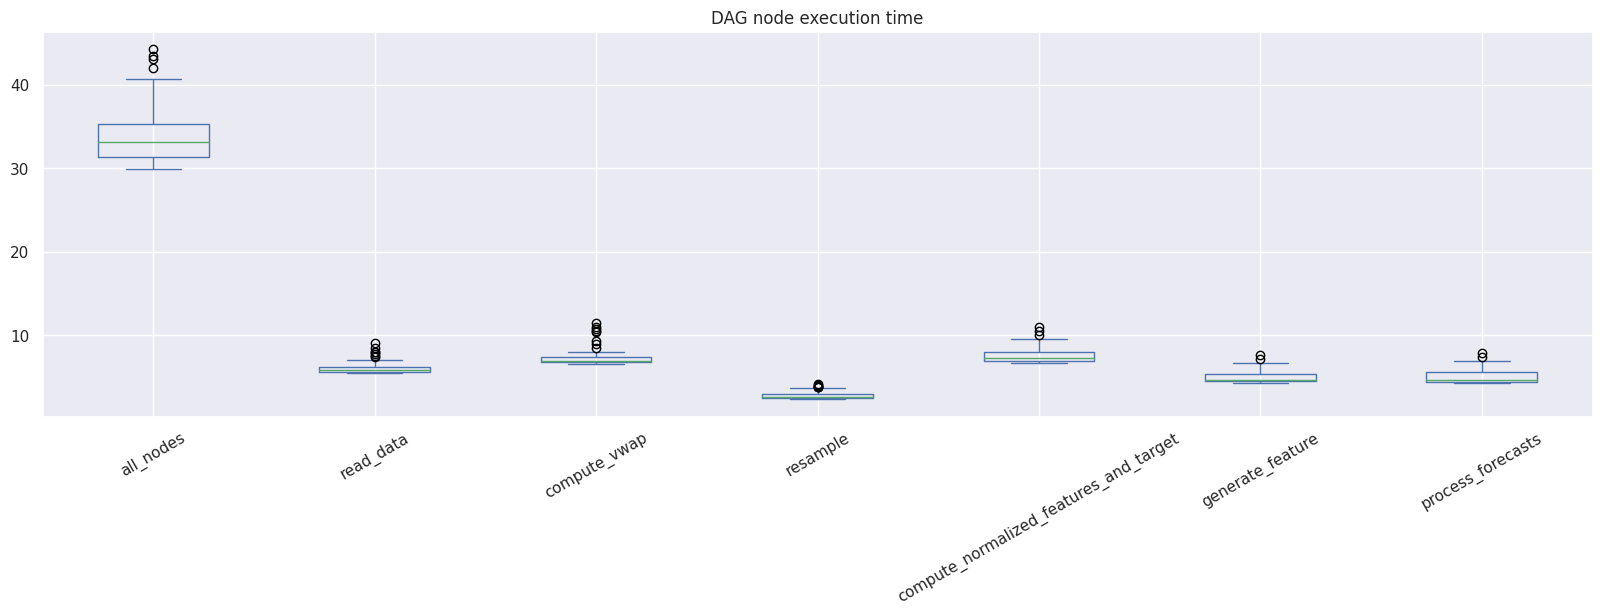

In [12]:
dtfcore.plot_dag_execution_stats(df_dag_execution_time_prod, report_stats=True)

,mean,min,max,std
all_nodes,27.354939,11.964,103.923,27.826767
read_data,3.716122,0.826,85.004,13.886383
compute_vwap,3.170571,1.517,64.813,8.999829
resample,1.983959,1.601,4.351,0.464137
compute_normalized_features_and_target,12.350735,4.375,86.437,21.127213
generate_feature,2.229592,1.763,3.854,0.528468
process_forecasts,3.903959,1.710,92.758,12.964422


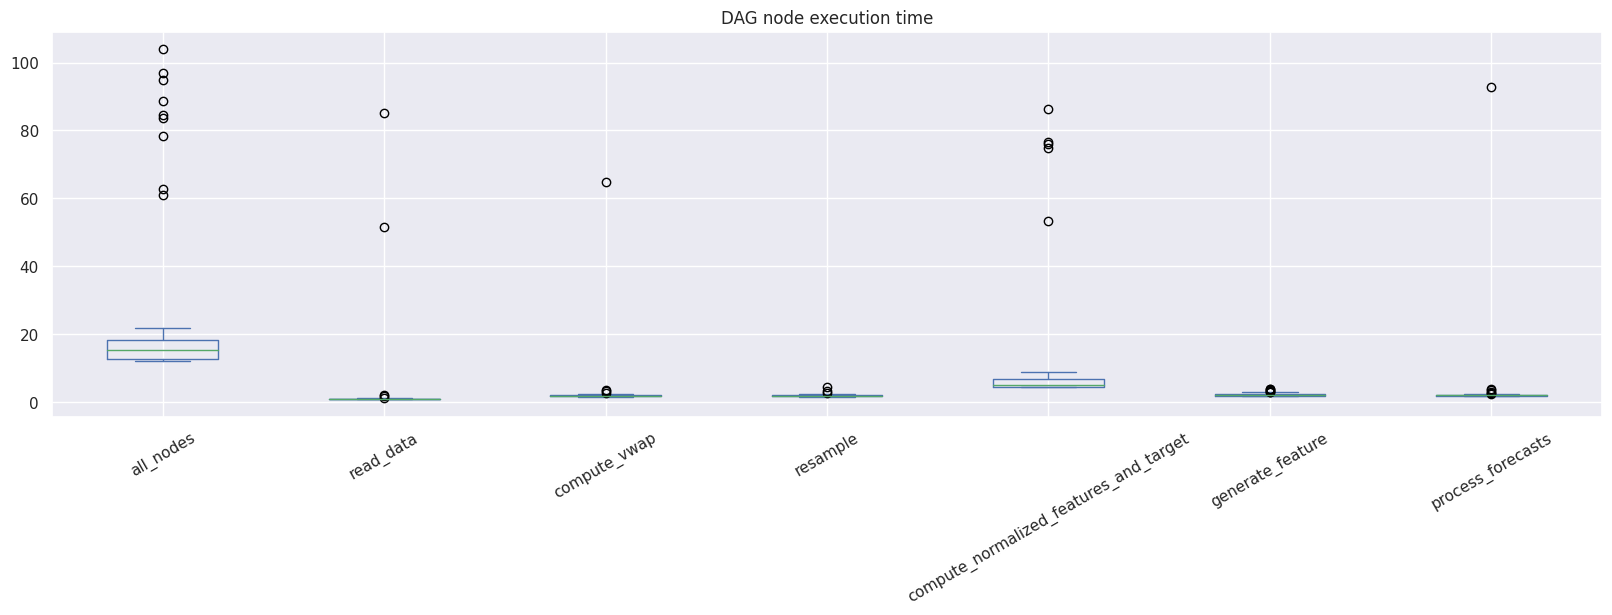

In [13]:
dtfcore.plot_dag_execution_stats(
    df_dag_execution_time_candidate, report_stats=True
)

# Compare DAG memory consumption

DAG memory consumption is reduced by 32x.

In [14]:
dag_df_out_size_prod = dtfcore.get_dag_df_out_size_for_all_nodes(
    dag_path_dict["prod"]
)
_LOG.info("DAG results df size:")
hpandas.df_to_str(dag_df_out_size_prod, num_rows=5, log_level=logging.INFO)

INFO  DAG results df size:


read_data        compute_vwap        resample        compute_normalized_features_and_target        generate_feature        process_forecasts       
                             n_cols n_rows       n_cols n_rows   n_cols n_rows                                 n_cols n_rows           n_cols n_rows            n_cols n_rows
2023-06-06 10:00:00-04:00       275   5760          300   5760      175   1152                                    600   1152              625   1152               625   1152
2023-06-06 10:05:00-04:00       275   5760          300   5760      175   1152                                    600   1152              625   1152               625   1152
                                ...    ...          ...    ...      ...    ...                                    ...    ...              ...    ...               ...    ...
2023-06-06 13:55:00-04:00       275   5760          300   5760      175   1152                                    600   1152              625   1152               625   1152
2023-06-06 14:00:00-04:00       275   5760          300   5760      175   1152                                    600   1152              625   1152               625   1152

In [15]:
dag_df_out_size_candidate = dtfcore.get_dag_df_out_size_for_all_nodes(
    dag_path_dict["candidate"]
)
_LOG.info("DAG results df size:")
hpandas.df_to_str(dag_df_out_size_candidate, num_rows=5, log_level=logging.INFO)

INFO  DAG results df size:


read_data        compute_vwap        resample        compute_normalized_features_and_target        generate_feature        process_forecasts       
                             n_cols n_rows       n_cols n_rows   n_cols n_rows                                 n_cols n_rows           n_cols n_rows            n_cols n_rows
2023-06-06 10:00:00-04:00       275    180          300    180      175     36                                    600     36              625     36               625     36
2023-06-06 10:05:00-04:00       275    180          300    180      175     36                                    600     36              625     36               625     36
                                ...    ...          ...    ...      ...    ...                                    ...    ...              ...    ...               ...    ...
2023-06-06 13:55:00-04:00       275    180          300    180      175     36                                    600     36              625     36               625     36
2023-06-06 14:00:00-04:00       275    180          300    180      175     36                                    600     36              625     36               625     36

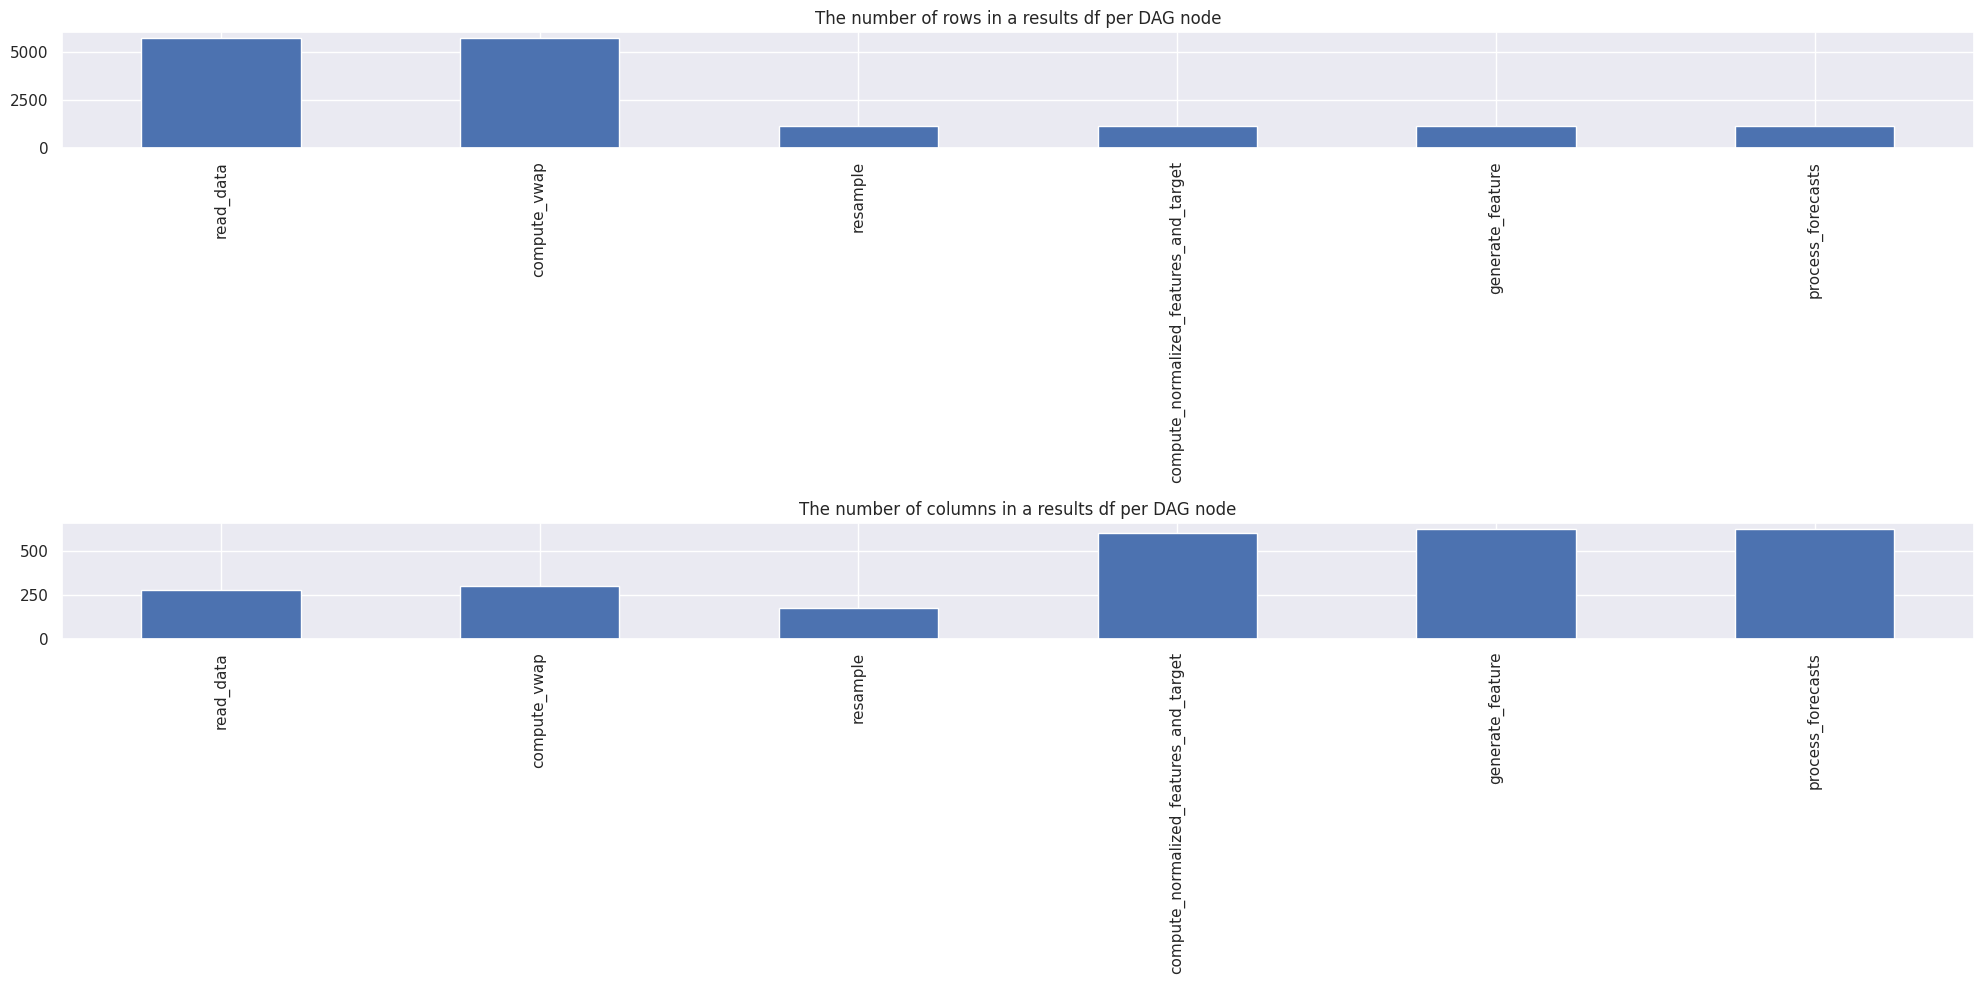

In [16]:
# Display the results df size distribution over the DAG nodes.
dtfcore.plot_dag_df_out_size_stats(dag_df_out_size_prod, report_stats=False)

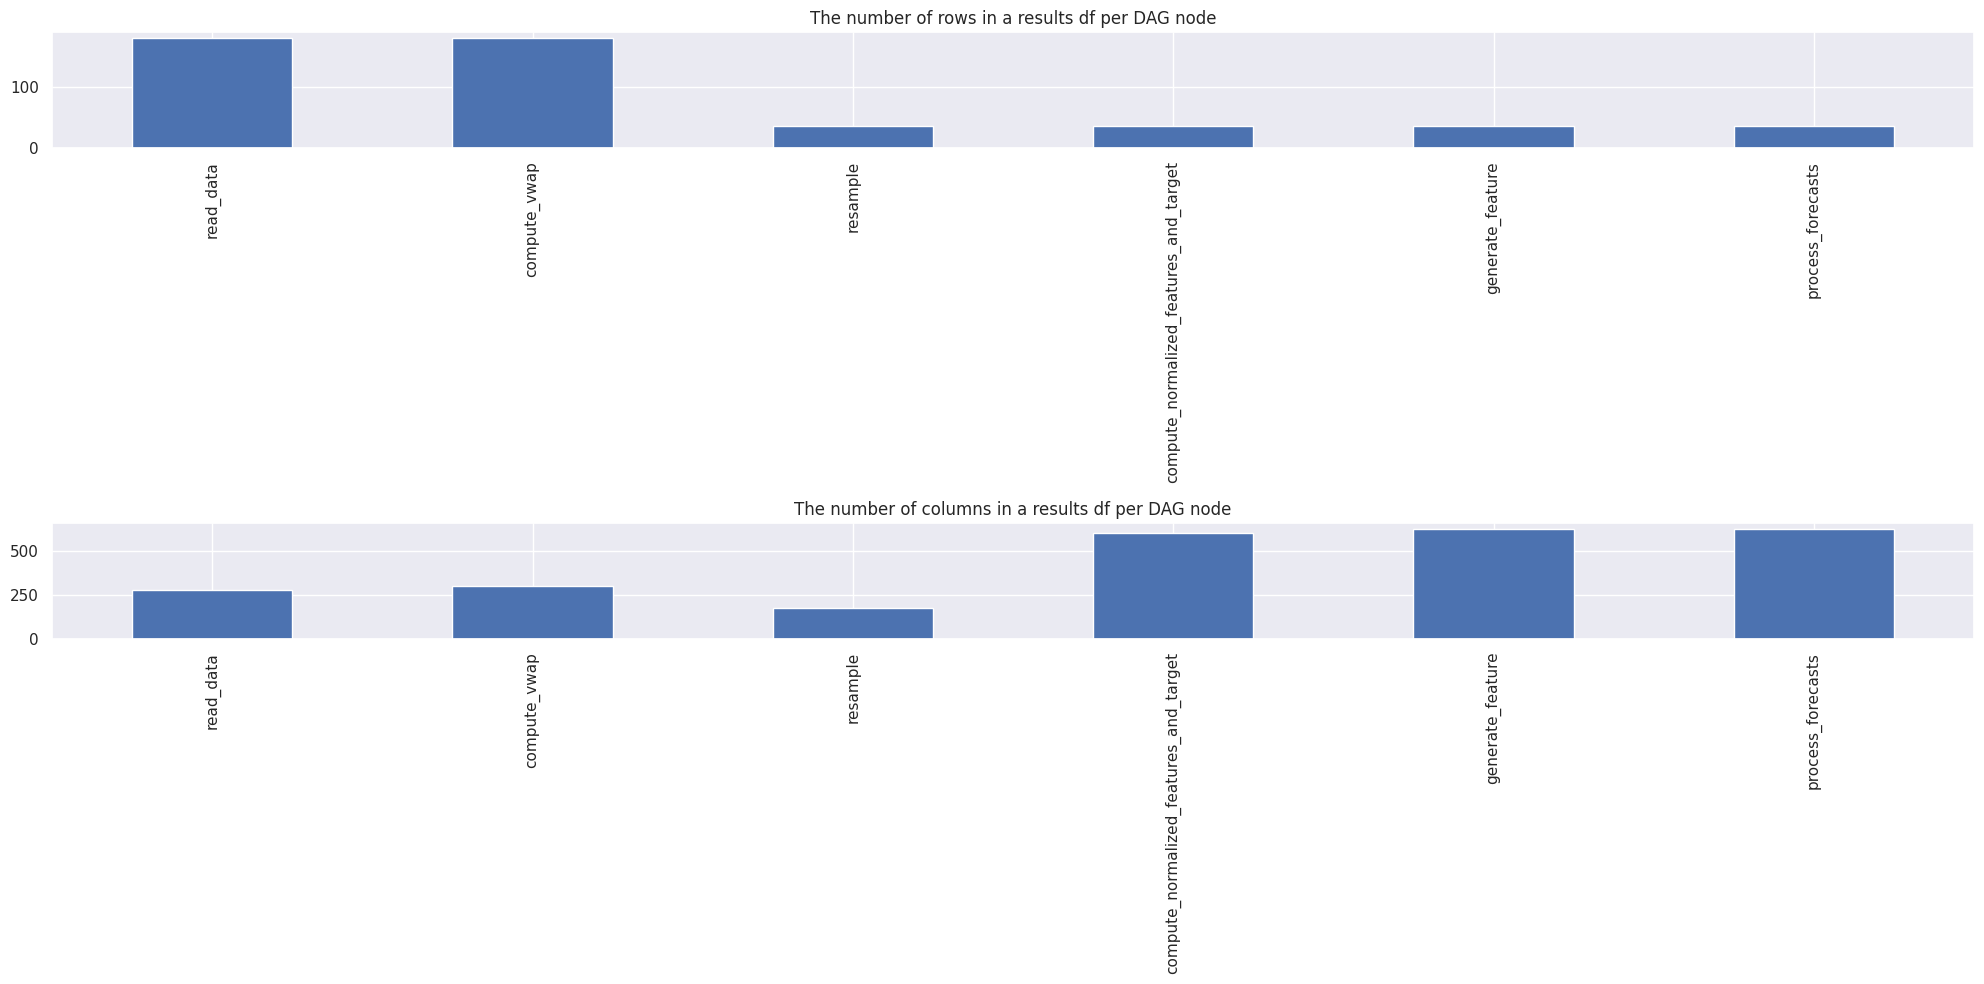

In [17]:
# Display the results df size distribution over the DAG nodes.
dtfcore.plot_dag_df_out_size_stats(dag_df_out_size_candidate, report_stats=False)

# Compare PnL

In [18]:
portfolio_dfs, portfolio_stats_dfs = reconcil.load_portfolio_dfs(
    portfolio_path_dict,
    config["bar_duration"],
)
hpandas.df_to_str(portfolio_dfs["prod"], num_rows=5, log_level=logging.INFO)

INFO  Processing portfolio=prod path=/shared_data/C8b_history_lookback_experiments/system_log_dir_history_lookback_4_days/process_forecasts/portfolio


Loading `holdings_shares` files...:   0%|          | 0/49 [00:00<?, ?it/s]

Loading `holdings_notional` files...:   0%|          | 0/49 [00:00<?, ?it/s]

Loading `executed_trades_shares` files...:   0%|          | 0/49 [00:00<?, ?it/s]

Loading `executed_trades_notional` files...:   0%|          | 0/49 [00:00<?, ?it/s]

Loading `statistics` files...:   0%|          | 0/49 [00:00<?, ?it/s]

INFO  Processing portfolio=candidate path=/shared_data/C8b_history_lookback_experiments/system_log_dir_history_lookback_3_hours/process_forecasts/portfolio


Loading `holdings_shares` files...:   0%|          | 0/49 [00:00<?, ?it/s]

Loading `holdings_notional` files...:   0%|          | 0/49 [00:00<?, ?it/s]

Loading `executed_trades_shares` files...:   0%|          | 0/49 [00:00<?, ?it/s]

Loading `executed_trades_notional` files...:   0%|          | 0/49 [00:00<?, ?it/s]

Loading `statistics` files...:   0%|          | 0/49 [00:00<?, ?it/s]

holdings_shares                                                                                                                                                                                                                                                                         holdings_notional                                                                                                                                                                                                                                                                              executed_trades_shares                                                                                                                                                                                                                                                                         executed_trades_notional                                                                                                                                                                                                                                                                                    pnl                                                                                                                                                                                                                                                                        
                               6051632686 8717633868 2540896331 1528092593 8968126878 1467591036 2476706208 5115052901 3065029174 1891737434 3401245610 1464553467 1966583502 1030828978 2601760471 2683705052 9872743573 2484635488 2099673105 4516629366 2237530510 2425308589 1776791608 2384892553 5118394986        1030828978  1464553467 1467591036 1528092593 1776791608 1891737434 1966583502 2099673105 2237530510  2384892553 2425308589 2476706208 2484635488 2540896331  2601760471 2683705052  3065029174 3401245610 4516629366 5115052901  5118394986 6051632686 8717633868 8968126878 9872743573             6051632686 8717633868 2540896331 1528092593 8968126878 1467591036 2476706208 5115052901 3065029174 1891737434 3401245610 1464553467 1966583502 1030828978 2601760471 2683705052 9872743573 2484635488 2099673105 4516629366 2237530510 2425308589 1776791608 2384892553 5118394986               6051632686 8717633868 2540896331 1528092593 1467591036 2476706208 5115052901 3065029174 1891737434 3401245610  1464553467 1966583502 1030828978  2601760471 2683705052 9872743573 2484635488 2099673105 4516629366 2237530510 2425308589 1776791608  2384892553  5118394986 8968126878 1030828978 1464553467 1467591036 1528092593 1776791608 1891737434 1966583502 2099673105 2237530510 2384892553 2425308589 2476706208 2484635488 2540896331 2601760471 2683705052 3065029174 3401245610 4516629366 5115052901 5118394986 6051632686 8717633868 8968126878 9872743573
2023-06-06 10:00:00-04:00             0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0               0.0         0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0         0.0        0.0        0.0        0.0        0.0         0.0        0.0         0.0        0.0        0.0        0.0         0.0        0.0        0.0        0.0        0.0                    0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0                      NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN         NaN        NaN        NaN         NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN    

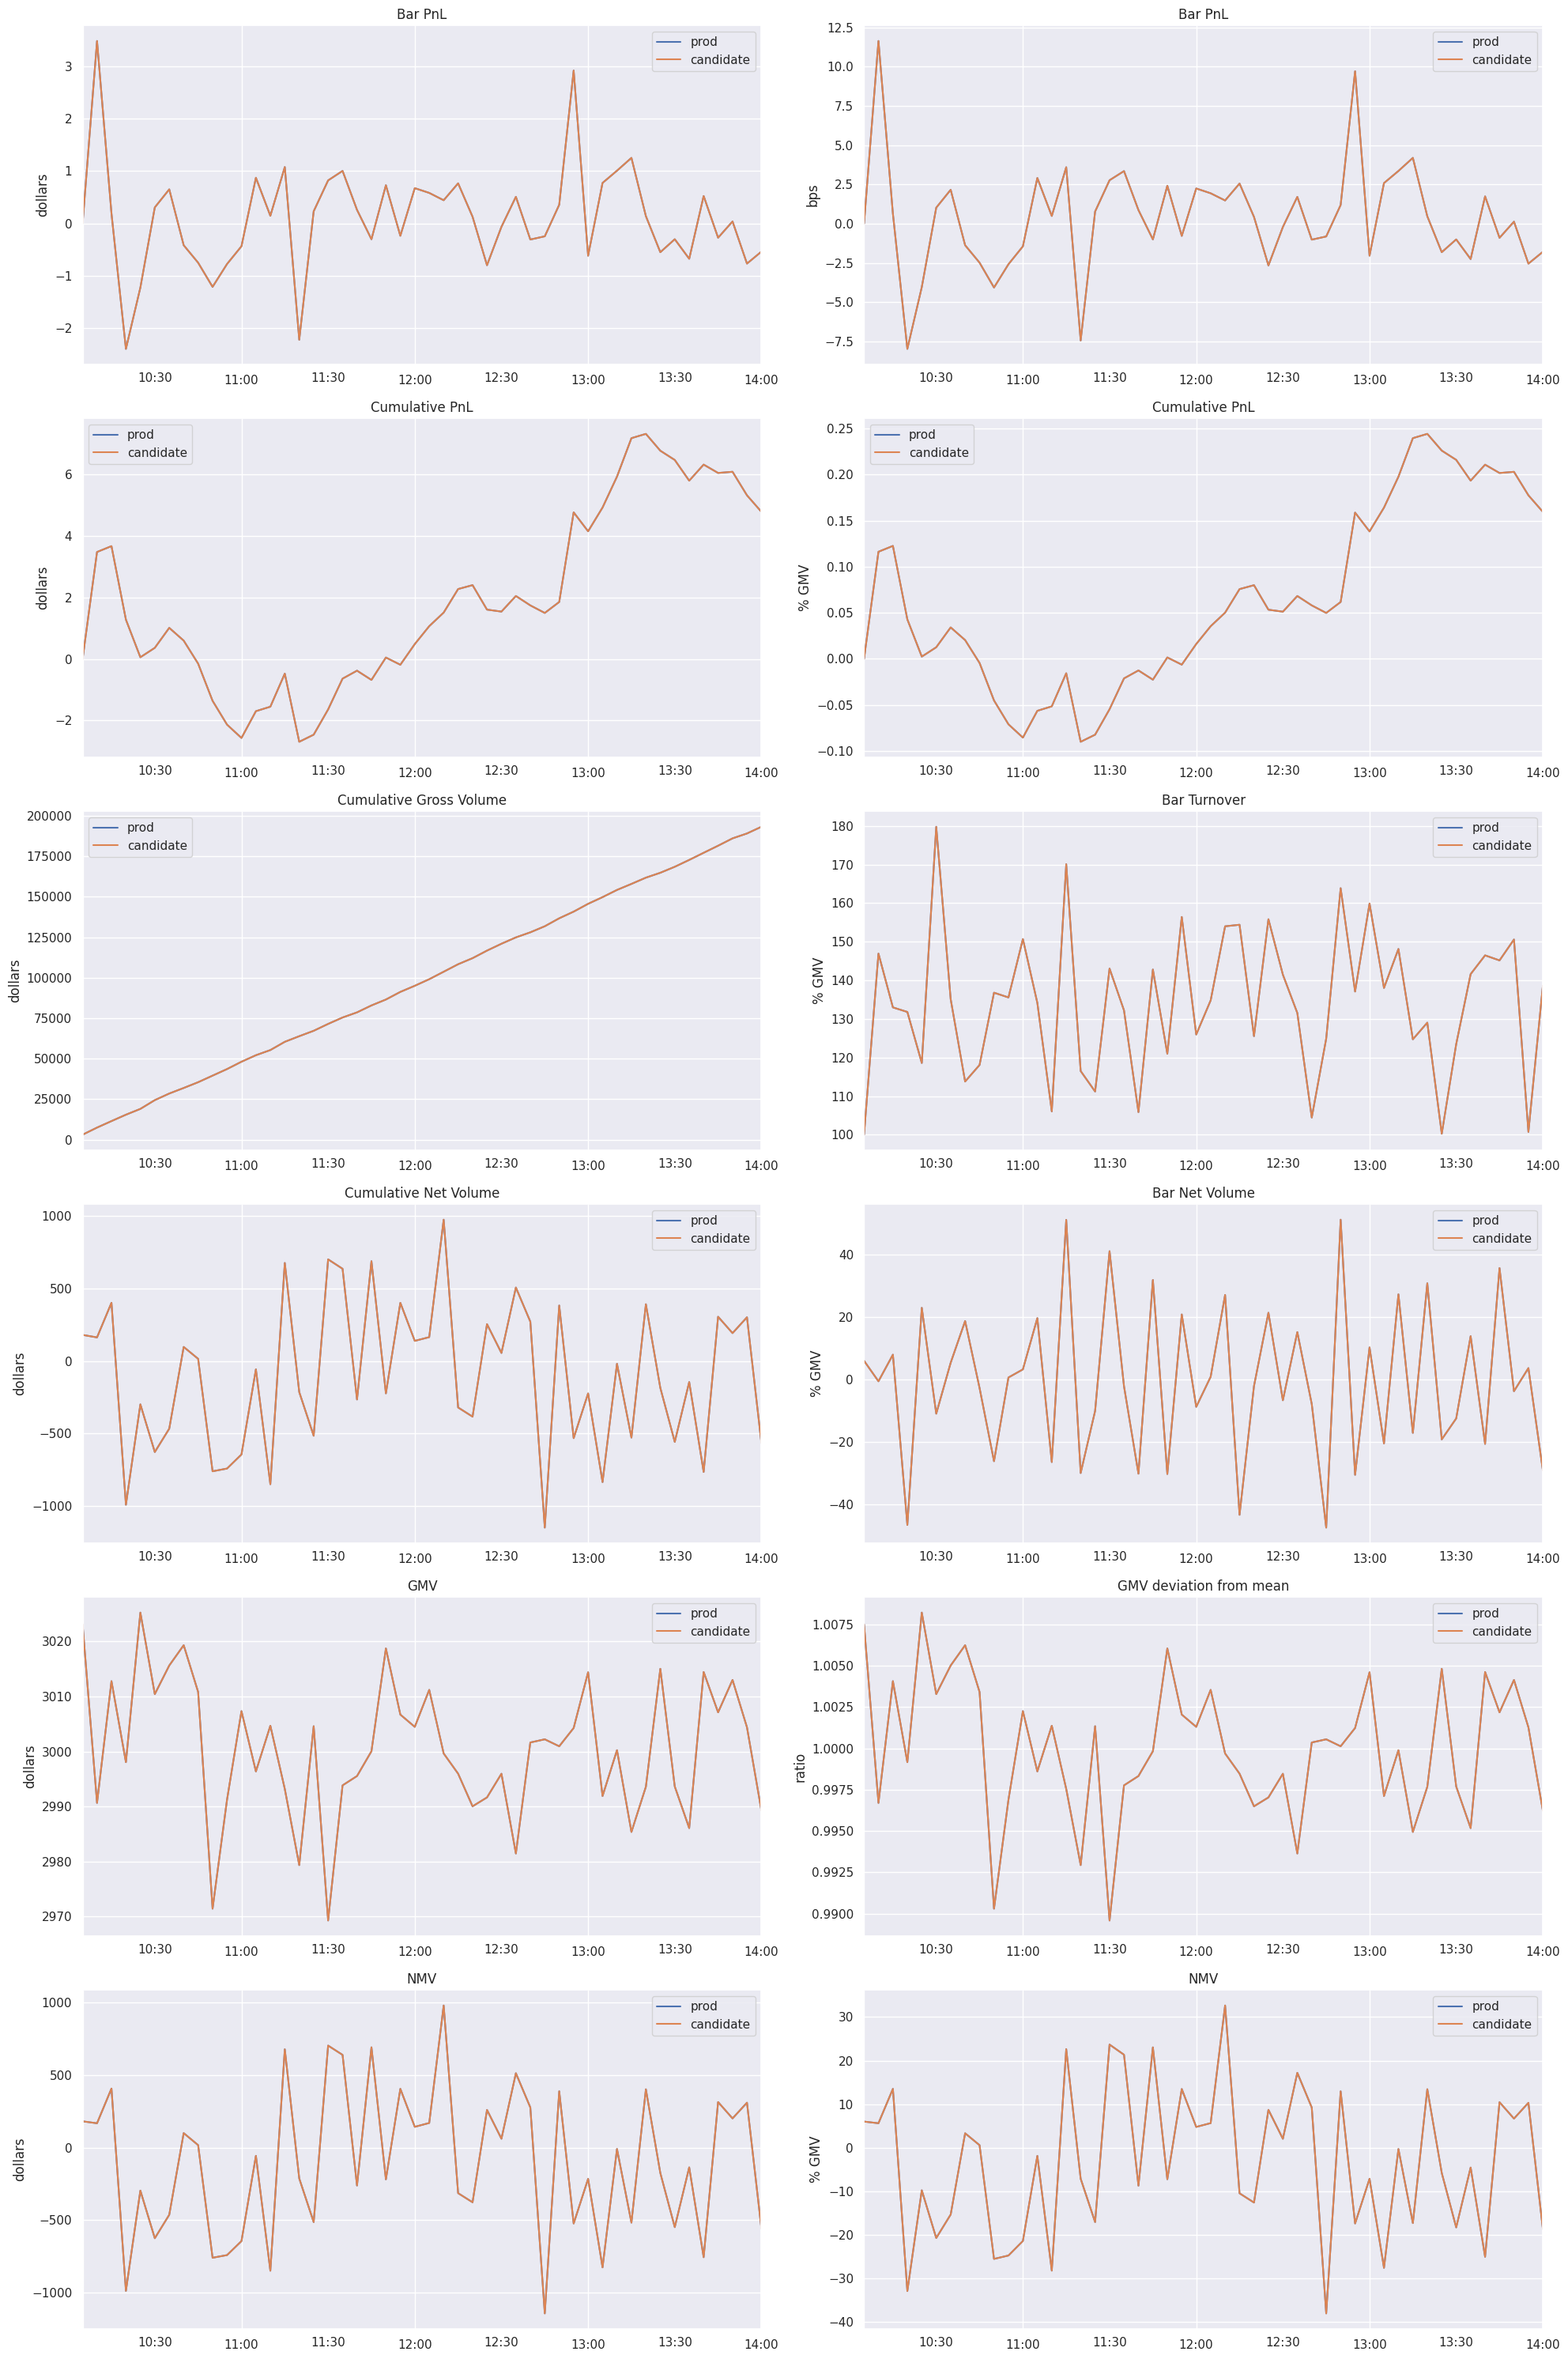

In [19]:
portfolio_stats_df = pd.concat(portfolio_stats_dfs, axis=1)
bars_to_burn = 1
coplotti.plot_portfolio_stats(portfolio_stats_df.iloc[bars_to_burn:])